In [1]:
import main as m
import homography as h
import filter as f
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from PIL import Image

from homography import FillBasedOnNeighbour

In [2]:
# Ordre
# haut, droite
# bas, droite
# haut gauche
# bas gauche

Quality = 4

PE = np.array([
    [1360, 530],
    [1030, 1630],
    [650, 300],
    [140, 1280]
])
margin = 20
#PS = np.array([
#    [1024-margin, margin],
#    [1024-margin, 1024-margin],
#    [margin, margin],
#    [margin, 1024-margin]
#])

PS = np.array([
    [2408,0],
    [2408,3508],
    [0,0],
    [0,3508]
    
])
PS = PS / Quality
PS += 100


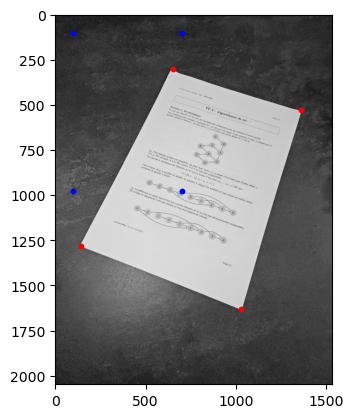

In [6]:
xe, ye = PE.T
xs, ys = PS.T

I = Image.open("images/extreme.jpeg", mode="r").convert('L')
#Img = m.Compresser(np.array(I), 1)
Img = I
plt.imshow(Img, cmap='gray')
plt.scatter(xe, ye, 10, color="red")
plt.scatter(xs, ys, 10, color="blue")
plt.show()

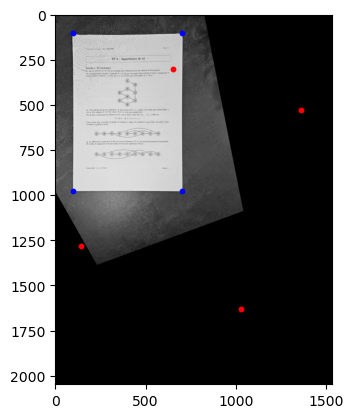

In [4]:
HImage, e_suraffectations = h.TransformationProjective(Img, PE, PS)
plt.imshow(HImage, cmap='gray')
plt.scatter(xe, ye, 10, color="red")
plt.scatter(xs, ys, 10, color="blue")
plt.show()

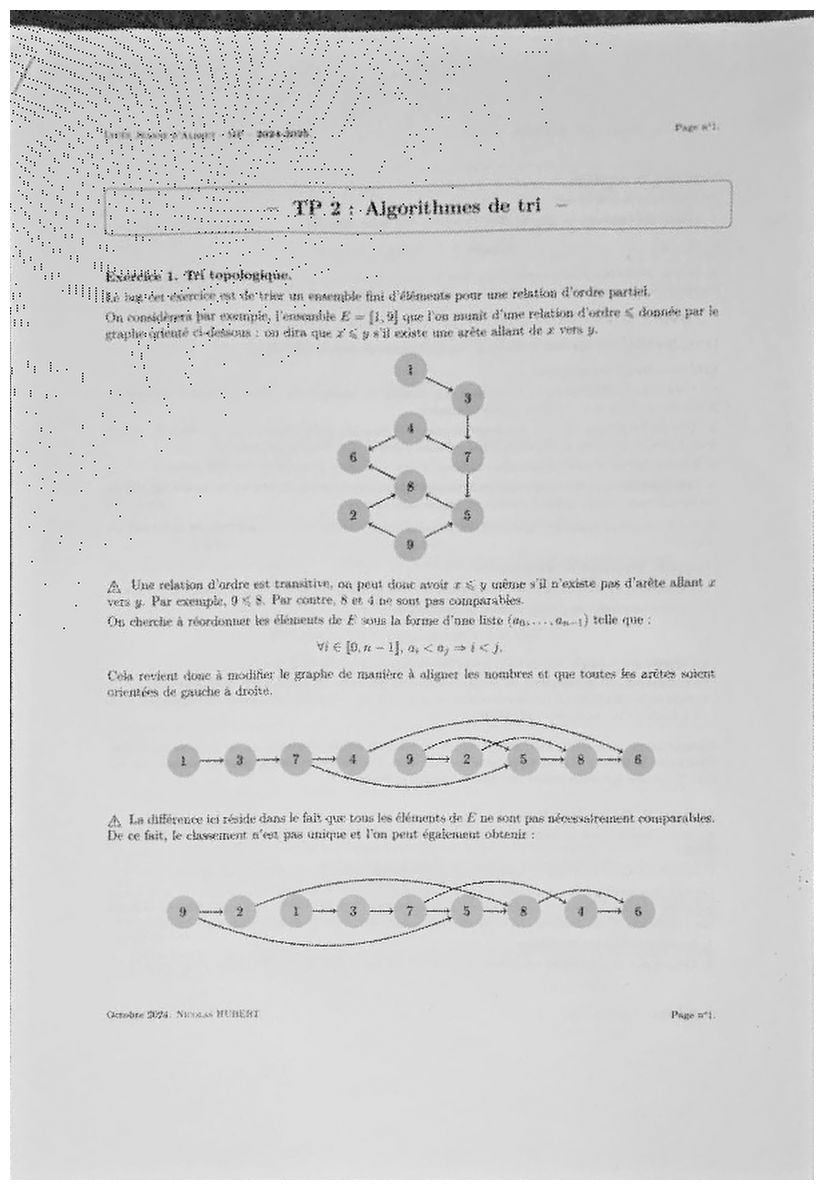

In [5]:
ImgCorped = h.CropImage(HImage, PS)
#m.Afficher(ImgCorped)
Base = ImgCorped.copy()
rgba_image = np.zeros((*ImgCorped.shape, 4), dtype=np.uint8)
rgba_image[..., 0] = ImgCorped  # Red channel
rgba_image[..., 1] = ImgCorped  # Green channel
rgba_image[..., 2] = ImgCorped  # Blue channel
rgba_image[..., 3] = np.where(Base == -1, 0, 255)
#plt.imsave('images/rawtransparent.png', rgba_image)


fig = plt.figure(frameon=False)
fig.set_size_inches(8.3, 11.7, 150) # A4
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(ImgCorped, interpolation='lanczos', cmap='gray')

In [ ]:
ImgFilled = h.FillBasedOnNeighbour(ImgCorped)
m.Afficher(ImgFilled)

In [7]:
def DensityError(I, N : int):
    """
    I : Image
    N : Nb sections
    """
    x, y = I.shape
    NBMAX = (x//N)*(y//N)
    l_X = np.linspace(0, x, x//N)
    l_Y = np.linspace(0, y, y//N)
    X, Y = np.meshgrid(l_X, l_Y)
    Z = np.zeros((x//N, y//N))
    for i in range(x):
        for j in range(y):
            if I[i,j] < 10 and (i//N < x//N) and (j//N < y//N):
                Z[i//N,j//N] += 1
    return X, Y, Z, NBMAX

In [8]:
N = 50
X, Y, Z, NBMAX = DensityError(F, N)

NameError: name 'F' is not defined

TypeError: Shapes of x (40, 29) and z (29, 40) do not match

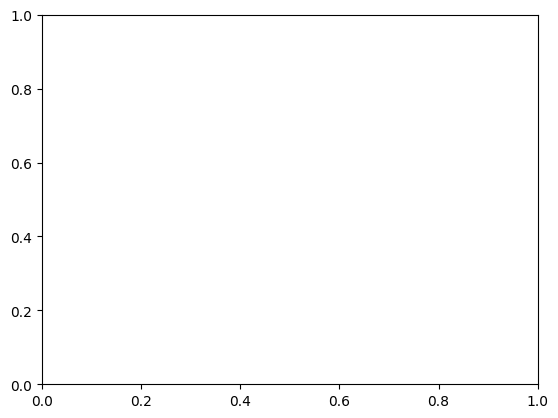

In [11]:
plt.figure()
plt.contourf(X,Y,(1/NBMAX)*Z, 150, cmap="plasma")
plt.xlabel("x de l'image")
plt.ylabel("y de l'image")
plt.title("Densité d'erreur en fonction de la position de l'image")
plt.colorbar()
plt.show()